### Загрузка библиотек

In [451]:

import pandas as pd
import numpy as np


from scipy import stats

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
#SKLEARN
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from xgboost import XGBRegressor
np.random.seed(0)

In [293]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### LOAD DATA

In [220]:
churn = pd.read_csv('churn_dataset.csv')
churn

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### first analysis

In [221]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account_length          3333 non-null   int64  
 2   Area_code               3333 non-null   int64  
 3   International_plan      3333 non-null   object 
 4   Voice_mail_plan         3333 non-null   object 
 5   Number_vmail_messages   3333 non-null   int64  
 6   Total_day_minutes       3333 non-null   float64
 7   Total_day_calls         3333 non-null   int64  
 8   Total_day_charge        3333 non-null   float64
 9   Total_eve_minutes       3333 non-null   float64
 10  Total_eve_calls         3333 non-null   int64  
 11  Total_eve_charge        3333 non-null   float64
 12  Total_night_minutes     3333 non-null   float64
 13  Total_night_calls       3333 non-null   int64  
 14  Total_night_charge      3333 non-null   

In [222]:
churn.Churn.astype('int64')

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [223]:
churn.dtypes

State                      object
Account_length              int64
Area_code                   int64
International_plan         object
Voice_mail_plan            object
Number_vmail_messages       int64
Total_day_minutes         float64
Total_day_calls             int64
Total_day_charge          float64
Total_eve_minutes         float64
Total_eve_calls             int64
Total_eve_charge          float64
Total_night_minutes       float64
Total_night_calls           int64
Total_night_charge        float64
Total_intl_minutes        float64
Total_intl_calls            int64
Total_intl_charge         float64
Customer_service_calls      int64
Churn                        bool
dtype: object

In [224]:
churn['Churn']= churn['Churn']*1

In [225]:
churn.describe()

,Account_length,Area_code,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


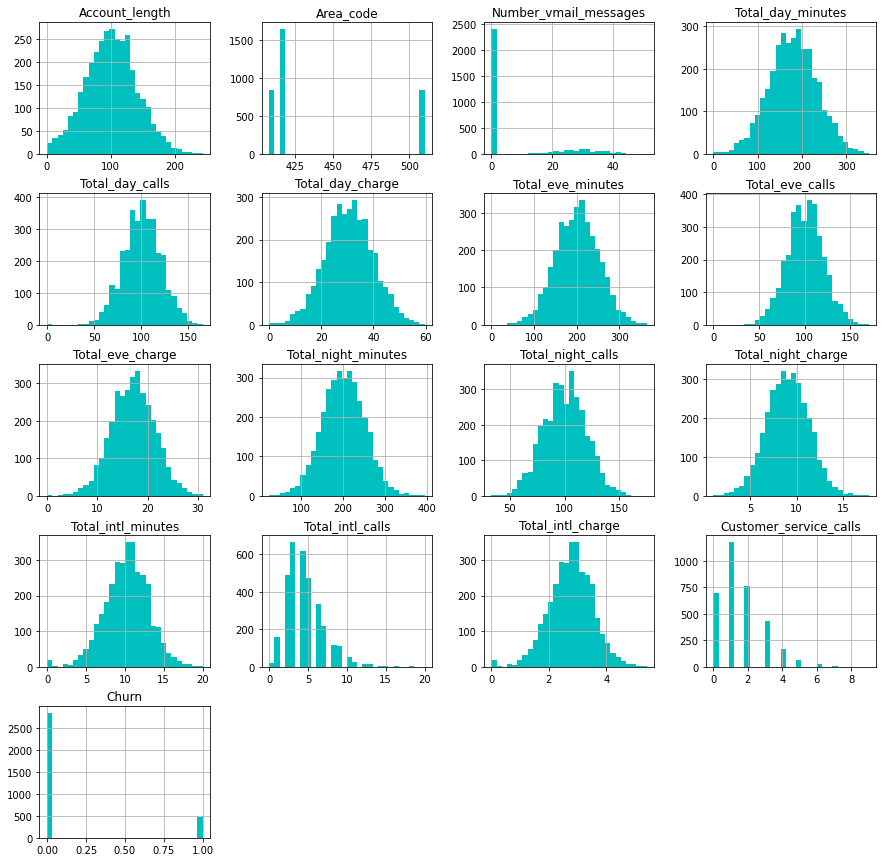

In [226]:
churn.hist(figsize=(15,15), bins=30, color='c')
plt.show()

In [227]:
###sns.pairplot(churn, hue="Churn")

In [228]:
churn.isnull().sum()

State                     0
Account_length            0
Area_code                 0
International_plan        0
Voice_mail_plan           0
Number_vmail_messages     0
Total_day_minutes         0
Total_day_calls           0
Total_day_charge          0
Total_eve_minutes         0
Total_eve_calls           0
Total_eve_charge          0
Total_night_minutes       0
Total_night_calls         0
Total_night_charge        0
Total_intl_minutes        0
Total_intl_calls          0
Total_intl_charge         0
Customer_service_calls    0
Churn                     0
dtype: int64

### Взгляд на проблему оттока путем построения разных графиков


In [229]:
churn.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

<AxesSubplot:title={'center':'All Over Churned Ratio'}, ylabel='Churn'>

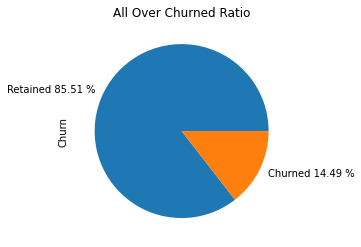

In [230]:
churn["Churn"].value_counts().plot(kind="pie", title="All Over Churned Ratio",
                                labels = ["Retained {:.2f} %".format(len(churn.loc[churn.Churn==0])*100/len(churn.Churn)),
                                          "Churned {:.2f} %".format(len(churn.loc[churn.Churn==1])*100/len(churn.Churn))],
                                figsize=(4,4))

In [231]:
churn.Total_day_charge.value_counts()

26.18    8
27.12    8
29.67    8
31.18    7
29.82    7
        ..
13.36    1
34.15    1
43.23    1
41.99    1
30.74    1
Name: Total_day_charge, Length: 1667, dtype: int64

In [232]:
churn.Total_night_charge.value_counts()

9.66     15
9.45     15
8.47     14
8.88     14
7.69     13
         ..
15.97     1
14.46     1
14.03     1
3.20      1
10.53     1
Name: Total_night_charge, Length: 933, dtype: int64

In [233]:
churn.Total_eve_charge.value_counts()

14.25    11
16.12    11
15.90    10
17.09     9
18.62     9
         ..
7.85      1
8.63      1
26.54     1
6.74      1
22.60     1
Name: Total_eve_charge, Length: 1440, dtype: int64

In [234]:
churn.Total_intl_charge.value_counts()

2.70    62
3.05    59
2.65    56
2.94    56
2.73    53
        ..
0.73     1
5.10     1
4.64     1
0.35     1
0.68     1
Name: Total_intl_charge, Length: 162, dtype: int64

### Корреляционная матрица, чтобы посмотреть на то, что влияет на отток

<AxesSubplot:>

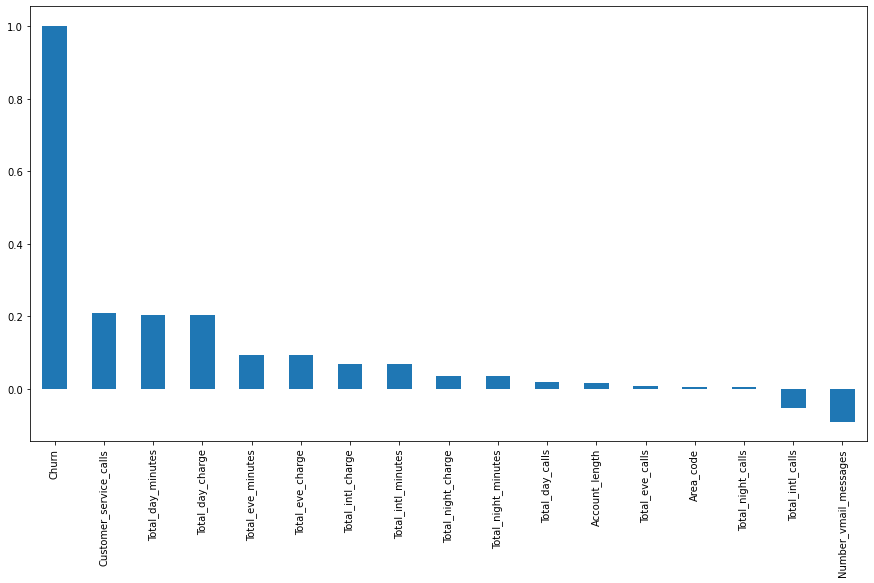

In [236]:
plt.figure(figsize=(15,8))
churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### АНАЛИЗ ГРАФИКОВ НА ОСНОВЕ МАТРИЦЫ

C:\Users\HONOR\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Total_day_calls')

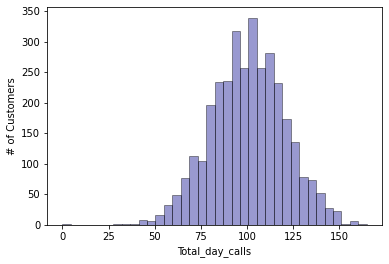

In [237]:
ax = sns.distplot(churn['Total_day_calls'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Total_day_calls')
###ax.set_title('# of Customers by their tenure')

Text(0.5, 0, 'Total_eve_calls')

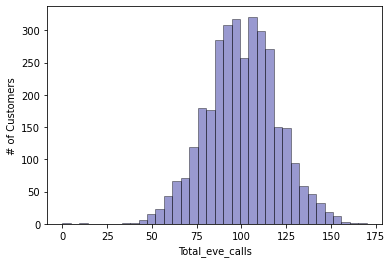

In [238]:
ax = sns.distplot(churn['Total_eve_calls'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Total_eve_calls')

Text(0.5, 0, 'Total_night_calls')

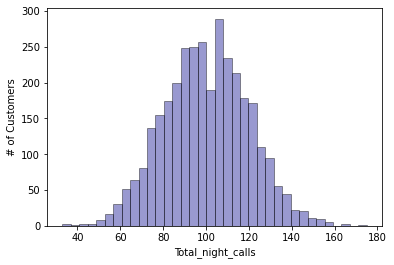

In [239]:
ax = sns.distplot(churn['Total_night_calls'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Total_night_calls')

Text(0.5, 0, 'Total_intl_calls')

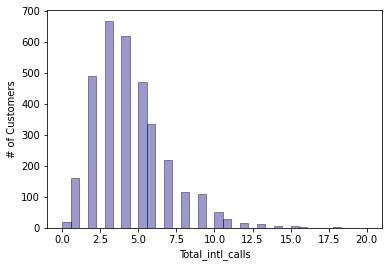

In [240]:
ax = sns.distplot(churn['Total_intl_calls'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Total_intl_calls')

<AxesSubplot:xlabel='Churn', ylabel='Customer_service_calls'>

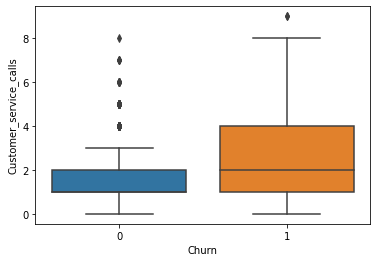

In [241]:
sns.boxplot(x = churn.Churn, y = churn.Customer_service_calls)

In [242]:
new_1 = churn[churn['Churn'] == 1] 

<AxesSubplot:xlabel='Total_day_charge', ylabel='Density'>

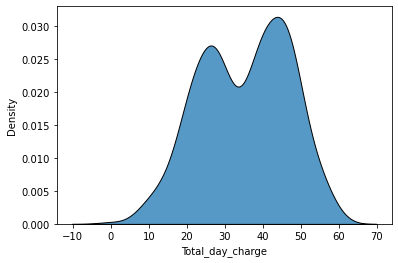

In [243]:
sns.kdeplot(data=new_1, x="Total_day_charge", multiple="stack")

<AxesSubplot:xlabel='Total_day_calls', ylabel='Density'>

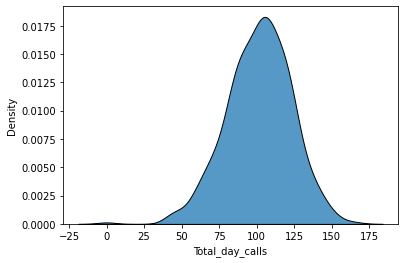

In [244]:
sns.kdeplot(data=new_1, x="Total_day_calls", multiple="stack")

<AxesSubplot:xlabel='Account_length', ylabel='Density'>

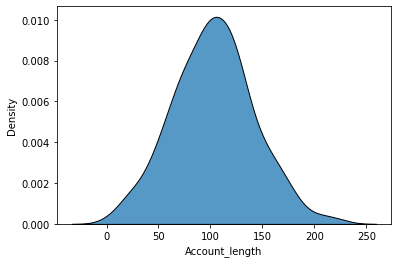

In [245]:
sns.kdeplot(data=new_1, x="Account_length", multiple="stack")

In [246]:
new_2 = churn[churn['Churn'] == 0] 

<AxesSubplot:xlabel='Total_day_charge', ylabel='Density'>

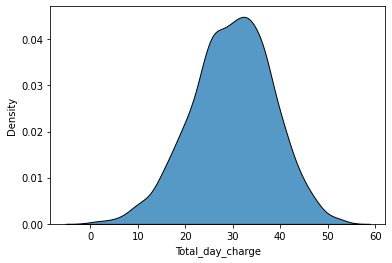

In [247]:
sns.kdeplot(data=new_2, x="Total_day_charge", multiple="stack")

<AxesSubplot:xlabel='Total_day_calls', ylabel='Density'>

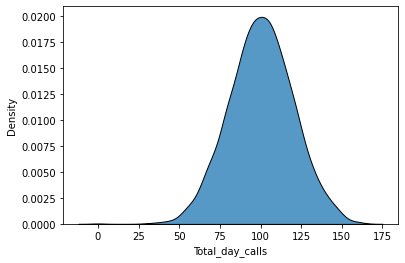

In [248]:
sns.kdeplot(data=new_2, x="Total_day_calls", multiple="stack")

<AxesSubplot:xlabel='Account_length', ylabel='Density'>

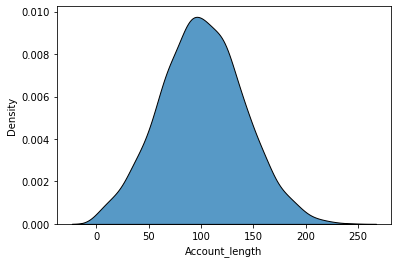

In [249]:
sns.kdeplot(data=new_2, x="Account_length", multiple="stack")

### Обьяснение 

Customer service cells, total day minutes, total day charge - влияют в большей степени на отток клиентов. 

In [250]:
churn_rate = 483/2850
churn_rate

0.1694736842105263

### Average Customer Lifetime (ACL) — Среднее время жизни клиента

In [251]:
ACL = 1/churn_rate
ACL

5.900621118012423

### ПОДГОТОВКА ДАННЫХ И ОБУЧЕНИЕ МОДЕЛИ

In [252]:
churn['International_plan'] = churn['International_plan'].map({'Yes':1, 'No':0})
churn['Voice_mail_plan'] = churn['Voice_mail_plan'].map({'Yes':1, 'No':0})


In [253]:
churn

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [254]:
churn_target = churn['Churn']
churn_target.to_numpy()
y = churn_target
y.size

3333

In [255]:
dropping = ["State", "Area_code","Churn"]
churn_drop=churn.drop(dropping, axis=1) 

In [218]:
churn_drop

,Account_length,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [256]:
features = churn_drop.columns

y=df_dummies['Churn'].values
X = df_dummies['Churn'].drop(columns=['Churn'])

In [404]:
X = churn_drop.values.astype(np.float64)
X

array([[128.  ,   0.  ,   1.  , ...,   3.  ,   2.7 ,   1.  ],
       [107.  ,   0.  ,   1.  , ...,   3.  ,   3.7 ,   1.  ],
       [137.  ,   0.  ,   0.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 28.  ,   0.  ,   0.  , ...,   6.  ,   3.81,   2.  ],
       [184.  ,   1.  ,   0.  , ...,  10.  ,   1.35,   2.  ],
       [ 74.  ,   0.  ,   1.  , ...,   4.  ,   3.7 ,   0.  ]])

### ПОСТРОЕНИЕ МОДЕЛЕЙ И ВЫВЕДЕНИЕ РЕЗУЛЬТАТОВ

In [405]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [446]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz

In [407]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train_full, y_train)
clf.score(X_train_full, y_train)

0.9103525881470368

In [408]:
clf1 = svm.SVC(kernel='linear')
clf1.fit(X_train_full, y_train)

SVC(kernel='linear')

In [409]:
y_pred=clf1.predict(X_valid_full)

In [410]:
accuracy_score(y_pred, y_valid)

0.8680659670164917

In [411]:
model_rf1 = RandomForestClassifier(n_estimators=50 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

In [412]:
model_rf1.fit(X_train_full, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=50)

In [413]:
valid = model_rf1.predict(X_valid_full)
accuracy_score(valid, y_valid)

0.9460269865067467

In [424]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_full, y_train)

KNeighborsClassifier(n_neighbors=3)

In [425]:
pred = neigh.predict(X_valid_full)
accuracy_score(pred, y_valid)

0.856071964017991

In [428]:
clf4 = LogisticRegression(random_state=0).fit(X_train_full, y_train)
p = clf4.predict(X_valid_full)
accuracy_score(p, y_valid)

C:\Users\HONOR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8620689655172413

In [429]:
print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 17 features
Unique target labels: [0 1]


In [430]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

In [431]:
results ={}
for i in range(1,9):
    results[50*i] = get_score(50*i)

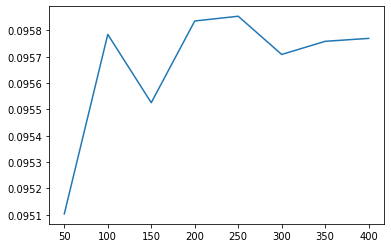

In [432]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [433]:
n_estimators_best = min(results, key=results.get)
n_estimators_best

50

In [434]:
my_model_1 = XGBRegressor(random_state = 0) #


my_model_1.fit(X_train_full, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [435]:
predictions_1 = my_model_1.predict(X_valid_full)
print("Mean Absolute error: " + str(mean_absolute_error(predictions_1, y_valid)))


Mean Absolute error: 0.09545894289249668


In [436]:
mae_1 = mean_absolute_error(predictions_1, y_valid)
print("Mean Absolute Error: ", mae_1)

Mean Absolute Error:  0.09545894289249668


In [437]:
my_model_2 = XGBRegressor(n_estimators = 50, learning_rate = 0.05, random_state = 0)
my_model_2.fit(X_train_full, y_train)
predictions_2 = my_model_2.predict(X_valid_full)
mae_2 = mean_absolute_error(predictions_2, y_valid)
print("Mean Absolute Error:" , mae_2)

Mean Absolute Error: 0.11049739780348504


### Таким образом, отток клиентов наблюдается из-за того, что наблюдается много неисправностей в сервисе компании, а также днем клиенты платят большую сумму денег, что повлияло на отток людей